In [8]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
from numpy.linalg import inv
import statsmodels.api as sm
import pandas as pd
import re
from sklearn.linear_model import LinearRegression

## MODELLO CON FC CONSIDERATA COME LA VARIABILE ENDOGENA

**ESSENDO INSERITO PER ULTIMO, IL FI SI TROVA ALL'ULTIMO RIGA DELLA MATRICE CHOLESKY E QUINDI RISENTE DEGLI SHOCK DI TUTTE LE ALTRE VARIABILI SENZA PERò POTERLE CONTEMPORANEAMENTE INFLUENZARE**

**CONCETTUALMENTE HA SENSO, PERCHE ESSENDO GLI SHOCK DI FI NON ORTOGONALI IN QUESTO CASO, LA LORO SIGNFICATIVITà AUMENTA, NONOSTANTE NON CI SIA UN INCREMENTO ESPONENZIALE**


*LO SI VEDE BENE NEL CASO DELLA FEVD, DOVE LA PERCENTUALE DI VARIANZA SPIEGATA DA UNO SHOCK FI CRESCE NEL TEMPO, MAN MANO CHE CALA LA QUOTA DEGLI ALTRI SHOCK, I QUALI TENDONO A RIASSORBIRSI*

In [9]:
df = pd.read_csv('/Users/tiziana/Desktop/PYTHON/TESI MAGISTRALE/PCA/DATESET.csv')
df=df.iloc[:, 1:]
df.head()


df.set_index(['Country'],inplace=True)
gre = pd.DataFrame(df.loc['Greece'])



gre.reset_index(inplace=True)
gre=gre.drop(['Country','Trimestre'],axis=1)

In [10]:
gre.shape

(69, 4)

In [11]:
dftest = adfuller(gre['Gdp growth'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print(f'Gdp growth is Stationary ')
else:
    print('Non stationary')



dftest = adfuller(gre['Current Account'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Current Account is Stationary')
else:
    print('Current Account Non stationary')


dftest = adfuller(gre['Public Debt'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Public Debt is Stationary')
else:
    print('Public Debt Non stationary')



dftest = adfuller(gre['Financial index'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print(f'Financial Index is Stationary con p-value{dftest[1]}')
else:
    print(f'Financial Index Non stationary con p-value {dftest[1]}')

Gdp growth is Stationary 
Current Account Non stationary
Public Debt Non stationary
Financial Index Non stationary con p-value 0.34094250194928877


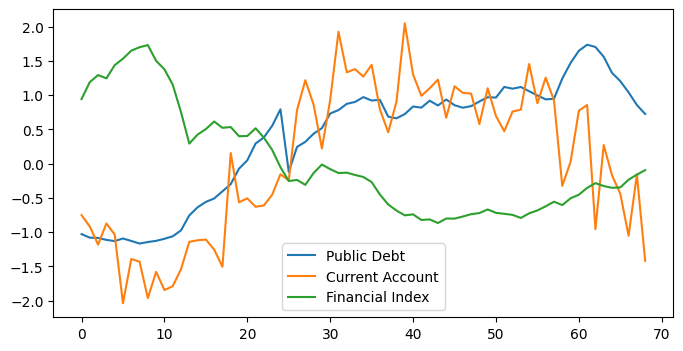

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 4))
plt.plot(gre['Public Debt'], label='Public Debt')
plt.plot(gre['Current Account'], label='Current Account')
plt.plot(gre['Financial index'], label='Financial Index')


plt.legend()

In [13]:
from statsmodels.tsa.api import VAR
model = VAR(gre)
lag_order = model.select_order(maxlags=8)  
lag_order.summary()


,AIC,BIC,FPE,HQIC
0,-5.990,-5.851,0.002505,-5.935
1,-11.48,-10.79*,1.033e-05*,-11.21*
2,-11.43,-10.18,1.099e-05,-10.94
3,-11.37,-9.570,1.185e-05,-10.66
4,-11.18,-8.831,1.476e-05,-10.26
5,-11.24,-8.338,1.470e-05,-10.11
6,-11.34,-7.884,1.452e-05,-9.989
7,-11.55*,-7.539,1.341e-05,-9.979
8,-11.42,-6.855,1.835e-05,-9.632


In [14]:
gre_coin = gre.drop('Gdp growth',axis=1)
gre_coin

,Current Account,Public Debt,Financial index
0,-0.751452,-1.028770,0.941476
1,-0.918176,-1.080483,1.189305
2,-1.182250,-1.084457,1.292024
3,-0.873659,-1.112864,1.243693
4,-1.034139,-1.130343,1.435652
...,...,...,...
64,-0.170813,1.323154,-0.352988
65,-0.439329,1.202653,-0.347566
66,-1.052215,1.039353,-0.234865
67,-0.160156,0.854735,-0.160790


In [15]:


from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
test = coint_johansen(gre_coin, det_order=1, k_ar_diff=3)

output = pd.DataFrame([test.lr1],  index=["trace_stat"], columns=['r=0', 'r<=1', 'r<=2'])
print(output.T, '\n')

cvt = pd.DataFrame(test.cvt, index=["r=0", "r<=1", "r<=2"], columns=["90%", "95%", "99%"])
print("Critical values(90%, 95%, 99%) of trace_stat\n", cvt, '\n')

print("Eigenvalues (lambda):\n")
print(test.eig, "\n")

print("Eigenvectors:")
evec = pd.DataFrame(test.evec).T
print(evec)

      trace_stat
r=0    28.426475
r<=1   12.786784
r<=2    0.031959 

Critical values(90%, 95%, 99%) of trace_stat
           90%      95%      99%
r=0   32.0645  35.0116  41.0815
r<=1  16.1619  18.3985  23.1485
r<=2   2.7055   3.8415   6.6349 

Eigenvalues (lambda):

[0.21385232 0.17817522 0.00049156] 

Eigenvectors:
          0         1         2
0  1.804208 -5.124188  0.620382
1 -1.781410 -0.715165 -5.060345
2  1.469755  0.235152  0.544371


In [16]:
gre['Gdp growth']=gre['Gdp growth']
gre['Current Account'] = gre['Current Account'].diff(1)
gre['Public Debt'] = gre['Public Debt'].diff(1)
gre['Financial index'] = gre['Financial index'].diff(1)

gre=gre.iloc[1:]

In [17]:
dftest = adfuller(gre['Current Account'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Current Account is Stationary')
else:
    print('Current Account Non stationary')


dftest = adfuller(gre['Public Debt'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Public Debt is Stationary')
else:
    print('Public Debt Non stationary')



dftest = adfuller(gre['Financial index'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Financial Index is Stationary')
else:
    print('Financial Index Non stationary')

Current Account is Stationary
Public Debt is Stationary
Financial Index is Stationary


In [18]:
from statsmodels.tsa.api import VAR
model = VAR(gre)
lag_order = model.select_order(maxlags=8)  
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,-11.26*,-11.12*,1.294e-05*,-11.20*
1,-11.23,-10.54,1.322e-05,-10.96
2,-11.03,-9.773,1.637e-05,-10.54
3,-10.99,-9.178,1.729e-05,-10.28
4,-10.92,-8.546,1.929e-05,-9.991
5,-11.03,-8.102,1.827e-05,-9.887
6,-11.20,-7.710,1.696e-05,-9.835
7,-11.19,-7.141,1.964e-05,-9.606
8,-11.11,-6.502,2.587e-05,-9.307


**RIFERIMENTO BIBLIOGRAFICO PER L'USO DELLA TECNICA DI BOOTSRAP NEL CALCOLO INTERVALLI CONFIDENZA, FONDAMENTALE https://www.jstor.org/stable/2246110?seq=4**

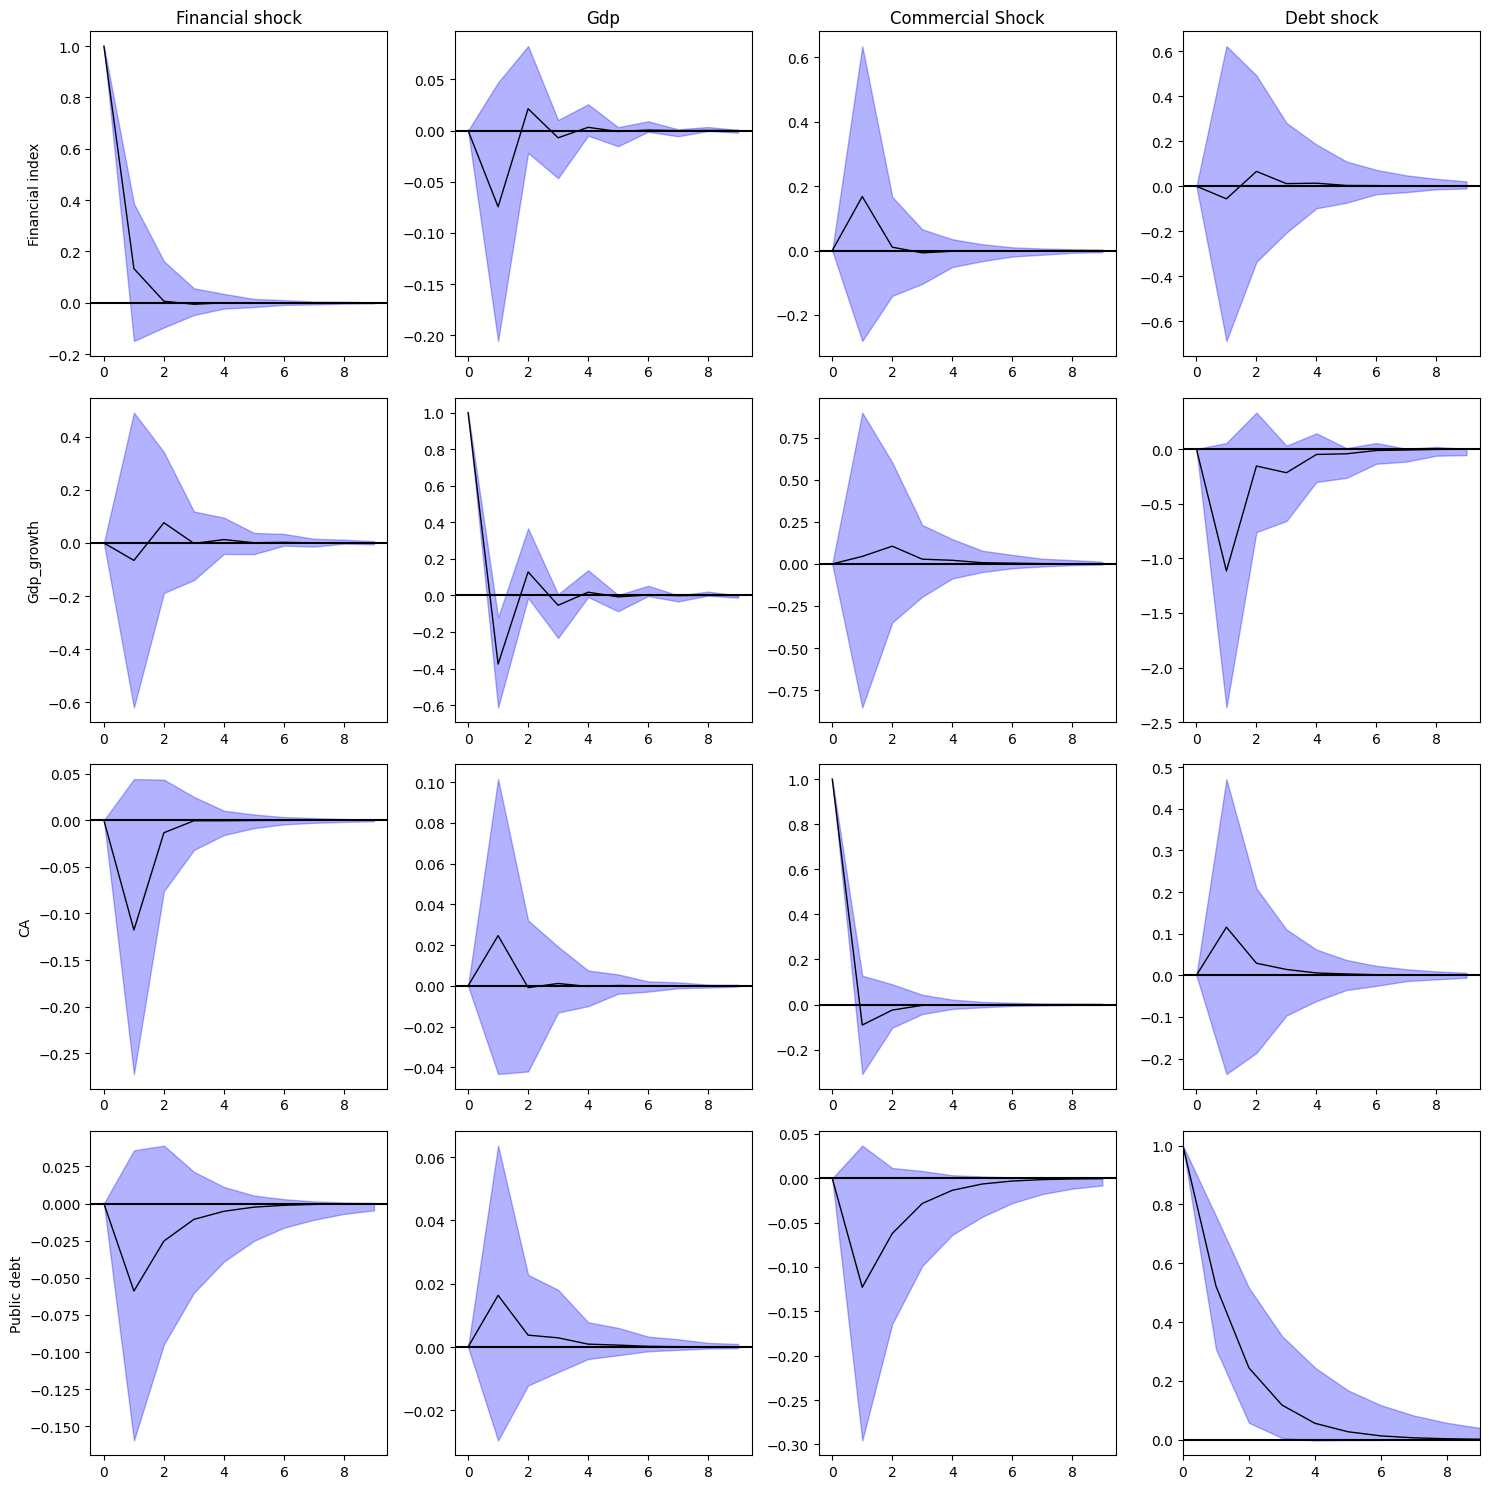

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Supponiamo che gre sia già definito
m = 4  # Considered Variable
p = 1  # Number of lags based on AIC criterion
c = 1  # Constant term, che inserisco per migliorare il fit del modello, visto che senza la costante le serie dovrebbero avere media 0 che è difficile.
h = 10 # IRF horizon

T = len(gre)
Y = gre.iloc[p:, :]  # Adjust for lags

# Create lagged matrix
X_lagged = pd.DataFrame()
for col in gre.columns:
    for i in range(1, p+1):
        X_lagged[f'{col}_lag_{i}'] = gre[col].shift(i)
X_lagged = X_lagged.iloc[p:, :]
X_lagged = X_lagged[[col for lag in sorted(set(int(re.search(r'_lag_(\d+)$', col).group(1)) if re.search(r'_lag_(\d+)$', col) else 0 for col in X_lagged.columns)) for col in [x for x in X_lagged.columns if re.search(fr'_lag_{lag}$', x)]] + [x for x in X_lagged.columns if not re.search(r'_lag_\d+$', x)]]
X_lagged.insert(0, 'const', 1)

# Estimate VAR model
pi_hat = np.dot(np.dot(np.linalg.inv(np.dot(X_lagged.T, X_lagged)), X_lagged.T), Y)
Y_fit = np.dot(X_lagged, pi_hat)
err = Y - Y_fit

A_comp = np.block([
    [pi_hat[1:, :].T],
    [np.eye(m * p - m), np.zeros((m * p - m, m))]
])

PHI = np.zeros((m, m, h))
for j in range(h):
    PHI_comp = np.linalg.matrix_power(A_comp, j)
    PHI[:, :, j] = PHI_comp[:m, :m]

PHI_plot = np.reshape(np.transpose(PHI, (2, 0, 1)), (h, m*m))

VARnames = ['Financial index', 'Gdp_growth', 'CA', 'Public debt']
Shocknames = ['Financial shock', 'Gdp', 'Commercial Shock', 'Debt shock']

ylab = 0

# Bootstrap per intervalli confidenza
n_bootstrap = 1000  #Iterazioni
alpha = 0.05        #Livello di significatività
bootstrap_phis = np.zeros((n_bootstrap, m, m, h))  #Creo una matrice per ora composta da soli zero che successivamente andrà riempita con i valori IRF bootstrappate

for b in range(n_bootstrap):
    
    resampled_err = err.sample(frac=1, replace=True).values  #Si campionano casualmente i residui del modello.Se ne estrae un sottoinsieme.
    Y_bootstrap = Y_fit + resampled_err                      #Con tali residui si calcola una nuova serie ottenuta a partire precedente, aggiungendo errori boostrappati

    #A QUESTO PUNTO SI CALCOLA NUOVAMENTE VAR SULLA SERIE PERO BOOSTRAPPATA
    pi_hat_bootstrap = np.dot(np.dot(np.linalg.inv(np.dot(X_lagged.T, X_lagged)), X_lagged.T), Y_bootstrap)
    A_comp_bootstrap = np.block([
        [pi_hat_bootstrap[1:, :].T],
        [np.eye(m * p - m), np.zeros((m * p - m, m))]
    ])

#TIPO QUI CALCOLO LE IRF  DELLA SERIE CON IL BOOTSTRAP
    for j in range(h):
        PHI_comp_bootstrap = np.linalg.matrix_power(A_comp_bootstrap, j)
        bootstrap_phis[b, :, :, j] = PHI_comp_bootstrap[:m, :m]

lower_bound = np.percentile(bootstrap_phis, alpha/2*100, axis=0)
upper_bound = np.percentile(bootstrap_phis, (1-alpha/2)*100, axis=0)

fig, axes = plt.subplots(m, m, figsize=(15, 15))
axes_flat = axes.flatten()
for k in range(m*m):
    ax = axes_flat[k]
    ax.plot(np.arange(h), PHI_plot[:, k], linewidth=1, color='k')
    lb = lower_bound[k // m, k % m, :]
    ub = upper_bound[k // m, k % m, :]
    ax.fill_between(np.arange(h), lb, ub, color='blue', alpha=0.3)
    ax.axhline(0, color='k', linestyle='-')
    if k < 4:
        ax.set_title(Shocknames[k])
    if k in [0, 4, 8, 12]:  # Corrected indices for labels
        ax.set_ylabel(VARnames[ylab])
        ylab += 1
ax.set_xlim([0, h-1])
plt.tight_layout()
plt.show()

In [1]:
pi_hat

NameError: name 'pi_hat' is not defined

In [20]:
#pi_hat è esattamente matrice coefficenti
coefficents = pd.DataFrame(pi_hat)
coefficents.columns = ['Gdp growth','Current Account','Public Debt','Financial index']
coefficents.index = ['Const.','Gdp_l1','Ca_l1','Pd_l1','Fi_l1',]
#La traspongo perchè così è facile vedere le diverse equazioni,ciascuna con un'esogena differente, riportata come indice
coefficents=coefficents.transpose()
coefficents

,Const.,Gdp_l1,Ca_l1,Pd_l1,Fi_l1
Gdp growth,-0.138443,0.133082,-0.074437,0.167950,-0.055859
Current Account,-0.033546,-0.065473,-0.375398,0.044592,-1.116352
Public Debt,0.013593,-0.117774,0.024671,-0.090964,0.115558
Financial index,-0.016050,-0.058888,0.016335,-0.122846,0.522661


**Se io lascio T gradi di libertà, la varianza degli errori sarà di certo maggiore che se lasciassi T-p-1(la costante) gradi di libert**

**Diciamo che dei T valori che potrebbero determinarsi liberamente, alcuni (p+1) non sono liberi invece, quindi non vado sovrastimare varianza errori**

In [21]:
#Matrice varianza covarianza residui,corretta per gradi libertà al fine di garantire robustezza
omega = np.dot(err.T, err) / (T - p - 1)

#Inversa della matrice di Gram, il termine tra parentesi nell'equzione dei coefficenti di regression: beta^ = (X_Transposed * X) X^(-1)y
X_lagged_inv = np.linalg.inv(np.dot(X_lagged.T, X_lagged))

#Prodotto di kronecher tra le due matrici,che permette di ottenere la matrice di varianza covarianza dei COEFFICENTI
var_cov_matrix = np.kron(omega, X_lagged_inv)

#Calcolo errore standard dei coefficenti: valori diagonale var_cov divisi per  la loro sqrt()
std_err = np.sqrt(np.diag(var_cov_matrix).reshape(pi_hat.shape))

#Creazione DataFrame per errori standard
std_err_df = pd.DataFrame(std_err, index=coefficents.columns, columns=[col + '_std' for col in coefficents.index])
std_err_df=std_err_df.transpose()

#Valore della statistica test per ciascun coefficente, ottenuta come rapporto  tra la matrice dei coefficenti e la matrice dei rispettivi errori standard
t_values = pi_hat / std_err
t_values_df = pd.DataFrame(t_values, index=coefficents.columns, columns=[col + '_t' for col in coefficents.index])


In [22]:
from scipy.stats import t

#Se ho 300 ossrvazioni, m=10 equzioni(variabili) in ognuna delle quali ci vanno p=10 coefficenti (ritardi), 99 valori sono assegnati quindi ho 201 gradi di libertà
degrees_of_freedom = T - (m * p) - 1

#Calcolo del p-value come 2(visto che sto ipotizzando due code) *(probabilità di ottenre un valore piu estremo di quello della statistica test osservata)
p_values = 2 * (1 - t.cdf(np.abs(t_values), df=degrees_of_freedom))


p_values_df = pd.DataFrame(p_values, index=coefficents.columns, columns=[col + '_p' for col in coefficents.index])
print("p-values DataFrame:")
p_values_df.transpose()

p-values DataFrame:


,Const.,Gdp_l1,Ca_l1,Pd_l1,Fi_l1
Gdp growth_p,0.001103,0.681990,0.867519,1.726215e-05,0.288363
Current Account_p,0.817013,0.394197,0.540201,7.353799e-01,0.000000
Public Debt_p,0.834429,0.666738,0.278233,6.153821e-01,0.179699
Financial index_p,0.945926,0.631298,0.839758,7.166046e-12,0.000033


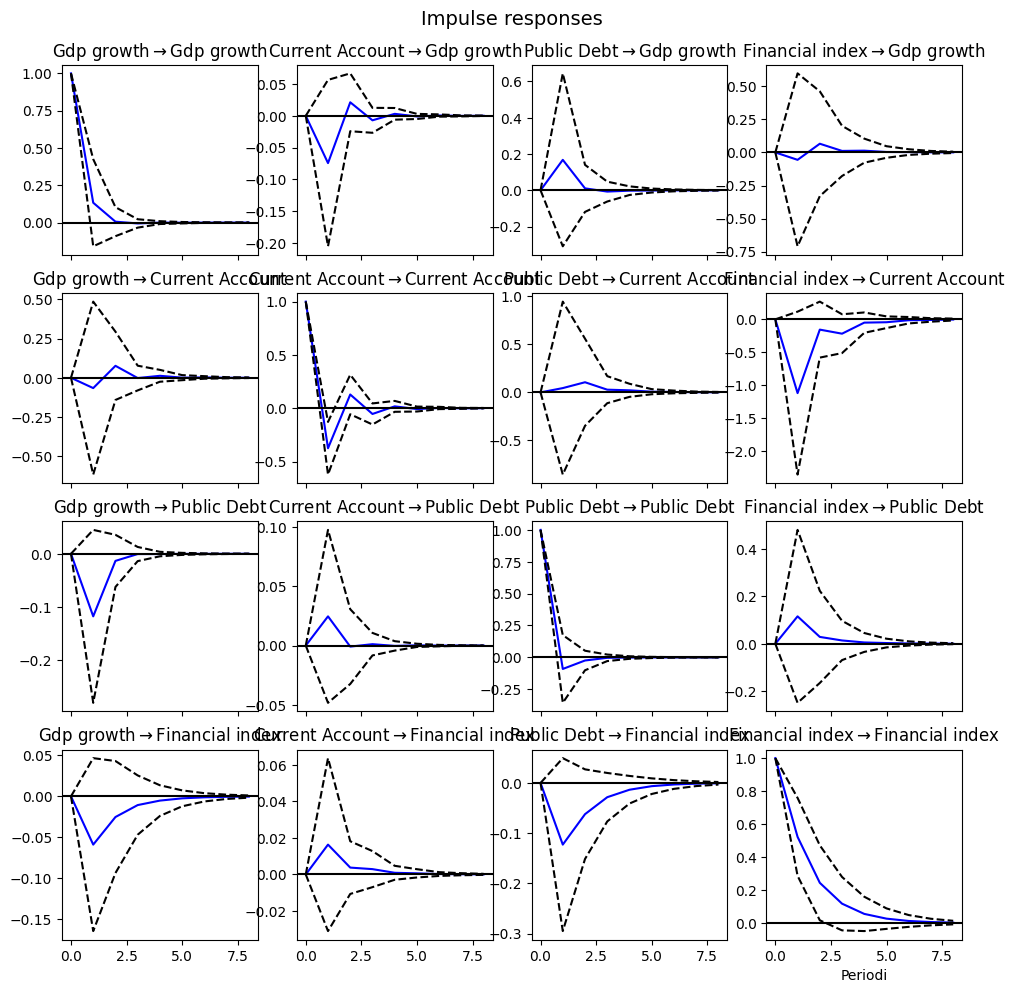

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 8 is zero: fail to reject at 5% significance level. Test statistic: 125.815, critical value: 137.701>, p-value: 0.176>


In [25]:
model = sm.tsa.VAR(gre)

# Stima il modello con un ordine di 6
results = model.fit(1)
irf = results.irf(10)

irf.plot(orth=False)
plt.xlabel('Periodi')

plt.show()

#Scelta del numero di ritardi pari a sqrt(T) {di fatto le osservazioni sono 69 per cui si potrebbe  scegliere tra 8 e 9}
whiteness_test_result = results.test_whiteness(nlags=8)
print(whiteness_test_result)

In [24]:

T = len(gre) - m * p - m

#Si calcola ancora la matrice di varianza e covarianza degli errori
omega = np.dot(err.T, err) / T

#Calcolo P, la matrice  che risulta dalla scomposzione di Cholewsky
P = np.linalg.cholesky(omega)

#Viene creata, per poi essere riempita, un tensor (credo sia un tensore,altrimenti è matrice tridimensionale)
PHI_SR = np.zeros((m, m, h))

#Si itera per ogni periodo  il prodotto tra la matrice di risposta all'impulso e la matrice di cholewsky P
for i in range(h):
    PHI_SR[:, :, i] = np.dot(PHI[:, :, i], P)
PHI_SR_plot = np.reshape(np.transpose(PHI_SR, (2, 0, 1)), (h, m*m))

VARnames = ['Gdp growth', 'Current Account', 'Public Debt','Financil index'] 
Shocknames = ['Gdp shock', 'Commercial shock', 'Debt shock','Financial shock']
ylab = 0
# Create subplots
ffig, axes = plt.subplots(m, m, figsize=(30, 30))
axes_flat = axes.flatten()
ylab = 0

# Parametri del bootstrap
B = 1000  # Numero di bootstrap
percentile = 95  # Intervallo di confidenza del 95%

# Bootstrap per calcolare gli intervalli di confidenza
PHI_SR_bootstrap = np.zeros((B, h, m * m))

for b in range(B):
    # Resampling con ripetizione dei residui
    err_bootstrap = err.sample(n=T, replace=True, axis=0).to_numpy()
    
    # Calcolo della matrice di covarianza dei residui bootstrap
    omega_bootstrap = np.dot(err_bootstrap.T, err_bootstrap) / T
    
    # Decomposizione di Cholesky di omega_bootstrap
    P_bootstrap = np.linalg.cholesky(omega_bootstrap)
    
    # Calcolo delle IRF bootstrap
    PHI_SR_bootstrap_b = np.zeros((m, m, h))
    for i in range(h):
        PHI_SR_bootstrap_b[:, :, i] = np.dot(PHI[:, :, i], P_bootstrap)
    
    PHI_SR_bootstrap[b, :, :] = np.reshape(np.transpose(PHI_SR_bootstrap_b, (2, 0, 1)), (h, m * m))

# Calcolo degli intervalli di confidenza
lower_bound = np.percentile(PHI_SR_bootstrap, (100 - percentile) / 2, axis=0)
upper_bound = np.percentile(PHI_SR_bootstrap, 100 - (100 - percentile) / 2, axis=0)

# Grafico delle IRF con intervalli di confidenza
for k in range(m * m):
    ax = axes_flat[k]
    ax.plot(np.arange(h), PHI_SR_plot[:, k], linewidth=1, color='k', label='IRF')
    ax.fill_between(np.arange(h), lower_bound[:, k], upper_bound[:, k], color='blue', alpha=0.3, label='CI')
    ax.axhline(0, color='k', linestyle='-')
    
    if k < 4: 
        ax.set_title(Shocknames[k])
    if k in [0, 5, 10, 15]: 
        ax.set_ylabel(VARnames[ylab])
        ylab += 1

    ax.set_xlim([0, h - 1])
    ax.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

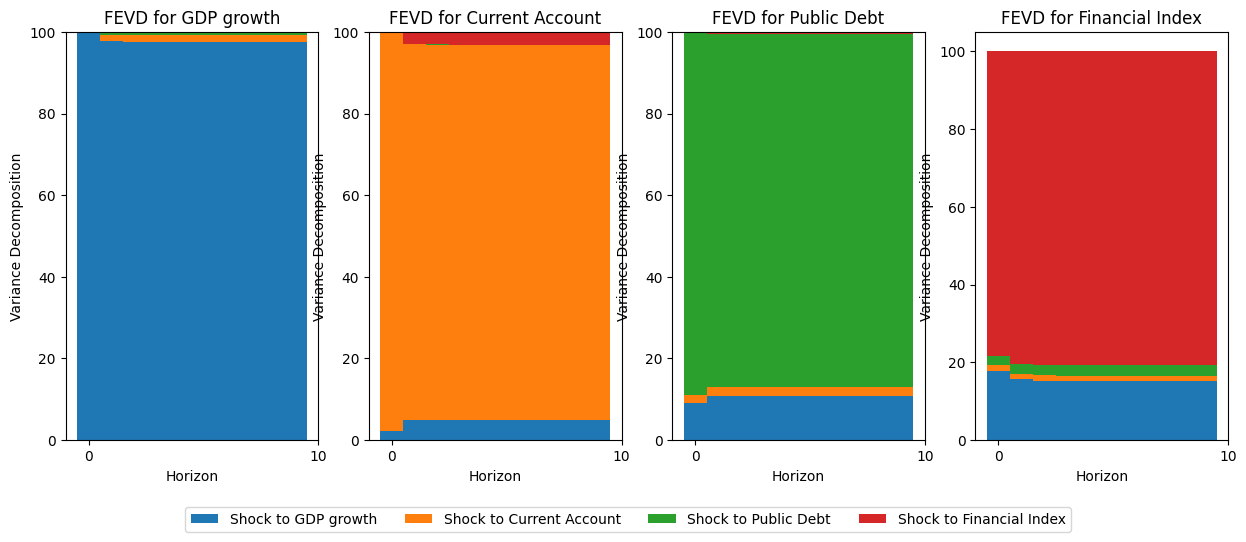

In [ ]:
h = 10
MSE = np.zeros((m, m, h))
MSE_shock = np.zeros((m, m, h))
FEVD = np.zeros((h, m, m))

MSE[:, :, 0] = omega
for ii in range(m):
    for nn in range(1, h):
        MSE[:, :, nn] = MSE[:, :, nn - 1] + PHI[:, :, nn] @ omega @ PHI[:, :, nn].T
    MSE_shock[:, :, 0] = P[:, ii].reshape(-1, 1) @ P[:, ii].reshape(1, -1)

    for nn in range(1, h):
        MSE_shock[:, :, nn] = MSE_shock[:, :, nn - 1] + PHI[:, :, nn] @ MSE_shock[:, :, 0] @ PHI[:, :, nn].T
    FECD = MSE_shock[:, :, :] / MSE[:, :, :]

    for nn in range(h):
        for kk in range(m):
            FEVD[nn, ii, kk] = 100 * FECD[kk, kk, nn]

def plot_FEVD(FEVD_result, variable_names, horizon=40):
    """
    Plot FEVD results using stacked bar plots in subplots.
    FEVD_result: The FEVD matrix of shape (n, n, horizon)
    variable_names: List of names of the variables
    horizon: The number of periods ahead for the forecast
    """
    FEVD_result = FEVD_result.transpose((2, 1, 0))
    n = FEVD_result.shape[0]
    cols = 4
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6 * rows))
    fig.subplots_adjust(bottom=0.2, hspace=0.4)

    if rows == 1:
        axes = axes.flatten()
    for i in range(n):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i]
        bottom_values = np.zeros(horizon)
        for j in range(n):
            ax.bar(np.arange(horizon), FEVD_result[i, j, :], bottom=bottom_values, width=1, label=f"Shock to {variable_names[j]}")
            bottom_values += FEVD_result[i, j, :]
        ax.set_title(f"FEVD for {variable_names[i]}")
        ax.set_xlabel("Horizon")
        ax.set_ylabel("Variance Decomposition")
        ax.set_xticks(np.linspace(0, horizon, int(horizon / 10) + 1, endpoint=True))

    for i in range(n, rows * cols):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i]
        ax.axis('off')

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1), ncol=len(variable_names))

variable_names = ['GDP growth', 'Current Account', 'Public Debt', 'Financial Index']
plot_FEVD(FEVD, variable_names, h)


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(gre[['Current Account', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.5513  , p=0.0367  , df_denom=64, df_num=1
ssr based chi2 test:   chi2=4.7646  , p=0.0291  , df=1
likelihood ratio test: chi2=4.6028  , p=0.0319  , df=1
parameter F test:         F=4.5513  , p=0.0367  , df_denom=64, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0588  , p=0.0542  , df_denom=61, df_num=2
ssr based chi2 test:   chi2=6.6191  , p=0.0365  , df=2
likelihood ratio test: chi2=6.3079  , p=0.0427  , df=2
parameter F test:         F=3.0588  , p=0.0542  , df_denom=61, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2911  , p=0.0268  , df_denom=58, df_num=3
ssr based chi2 test:   chi2=11.0650 , p=0.0114  , df=3
likelihood ratio test: chi2=10.2181 , p=0.0168  , df=3
parameter F test:         F=3.2911  , p=0.0268  , df_denom=58, df_num=3


{1: ({'ssr_ftest': (4.5512967703501666, 0.03673331703745287, 64.0, 1),
   'ssr_chi2test': (4.76463880646033, 0.029050154104926455, 1),
   'lrtest': (4.60284905424561, 0.03191887041635577, 1),
   'params_ftest': (4.551296770350151, 0.03673331703745321, 64.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.058847828130212, 0.05420387363983096, 61.0, 2),
   'ssr_chi2test': (6.6191461198883275, 0.036531767299519534, 2),
   'lrtest': (6.307875135920369, 0.042683725468818545, 2),
   'params_ftest': (3.058847828130212, 0.05420387363983096, 61.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.2911251133755086, 0.02681166915956238, 58.0, 3),
   'ssr_chi2test': (11.064989605314212, 0.011379593105523188, 3),
   'lrtest': (10.21805403866911, 0.016800699470580438, 3),
   'params_ftest': (3.291125113375507, 0.026811669159562502, 58.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.

In [ ]:
grangercausalitytests(gre[['Public Debt', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0032  , p=0.9551  , df_denom=64, df_num=1
ssr based chi2 test:   chi2=0.0033  , p=0.9539  , df=1
likelihood ratio test: chi2=0.0033  , p=0.9539  , df=1
parameter F test:         F=0.0032  , p=0.9551  , df_denom=64, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1436  , p=0.8665  , df_denom=61, df_num=2
ssr based chi2 test:   chi2=0.3108  , p=0.8561  , df=2
likelihood ratio test: chi2=0.3101  , p=0.8564  , df=2
parameter F test:         F=0.1436  , p=0.8665  , df_denom=61, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0715  , p=0.9750  , df_denom=58, df_num=3
ssr based chi2 test:   chi2=0.2404  , p=0.9708  , df=3
likelihood ratio test: chi2=0.2400  , p=0.9709  , df=3
parameter F test:         F=0.0715  , p=0.9750  , df_denom=58, df_num=3


{1: ({'ssr_ftest': (0.0031880174957911417, 0.9551492501978616, 64.0, 1),
   'ssr_chi2test': (0.003337455815906351, 0.9539312631533807, 1),
   'lrtest': (0.003337372694716123, 0.9539318362027654, 1),
   'params_ftest': (0.0031880174958002403, 0.9551492501977616, 64.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.14364734038164975, 0.8664853064646216, 61.0, 2),
   'ssr_chi2test': (0.3108434250881601, 0.8560540926026914, 2),
   'lrtest': (0.31011371811464983, 0.8563664839082916, 2),
   'params_ftest': (0.14364734038164223, 0.8664853064646305, 61.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.07150794457169403, 0.9749725425309099, 58.0, 3),
   'ssr_chi2test': (0.24041464123241957, 0.9708154596074561, 3),
   'lrtest': (0.23997112528513753, 0.9708923624034322, 3),
   'params_ftest': (0.07150794457169483, 0.9749725425309099, 58.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0

In [ ]:
grangercausalitytests(gre[['Gdp growth', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0388  , p=0.8444  , df_denom=64, df_num=1
ssr based chi2 test:   chi2=0.0407  , p=0.8402  , df=1
likelihood ratio test: chi2=0.0406  , p=0.8402  , df=1
parameter F test:         F=0.0388  , p=0.8444  , df_denom=64, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1544  , p=0.8573  , df_denom=61, df_num=2
ssr based chi2 test:   chi2=0.3341  , p=0.8462  , df=2
likelihood ratio test: chi2=0.3332  , p=0.8465  , df=2
parameter F test:         F=0.1544  , p=0.8573  , df_denom=61, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1640  , p=0.9202  , df_denom=58, df_num=3
ssr based chi2 test:   chi2=0.5512  , p=0.9075  , df=3
likelihood ratio test: chi2=0.5489  , p=0.9080  , df=3
parameter F test:         F=0.1640  , p=0.9202  , df_denom=58, df_num=3


{1: ({'ssr_ftest': (0.038839143173794055, 0.8443922204412468, 64.0, 1),
   'ssr_chi2test': (0.04065972801006565, 0.8401961588633737, 1),
   'lrtest': (0.04064739558512542, 0.8402200689659004, 1),
   'params_ftest': (0.03883914317379424, 0.8443922204412468, 64.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.15437314897218815, 0.8572859183920964, 61.0, 2),
   'ssr_chi2test': (0.3340533715463744, 0.8461770301475886, 2),
   'lrtest': (0.33321082201945273, 0.8465335782729004, 2),
   'params_ftest': (0.15437314897219348, 0.8572859183920906, 61.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.16395423867718426, 0.920212388315584, 58.0, 3),
   'ssr_chi2test': (0.5512254576215677, 0.907501582981517, 3),
   'lrtest': (0.548901284424403, 0.9080239070384407, 3),
   'params_ftest': (0.1639542386771836, 0.9202123883155855, 58.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [ ]:
grangercausalitytests(gre[['Financial index', 'Current Account']], 3)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1041  , p=0.7480  , df_denom=64, df_num=1
ssr based chi2 test:   chi2=0.1090  , p=0.7413  , df=1
likelihood ratio test: chi2=0.1089  , p=0.7414  , df=1
parameter F test:         F=0.1041  , p=0.7480  , df_denom=64, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4230  , p=0.6570  , df_denom=61, df_num=2
ssr based chi2 test:   chi2=0.9153  , p=0.6328  , df=2
likelihood ratio test: chi2=0.9090  , p=0.6348  , df=2
parameter F test:         F=0.4230  , p=0.6570  , df_denom=61, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5535  , p=0.6478  , df_denom=58, df_num=3
ssr based chi2 test:   chi2=1.8610  , p=0.6017  , df=3
likelihood ratio test: chi2=1.8349  , p=0.6074  , df=3
parameter F test:         F=0.5535  , p=0.6478  , df_denom=58, df_num=3


{1: ({'ssr_ftest': (0.10411191694726049, 0.74800165001158, 64.0, 1),
   'ssr_chi2test': (0.10899216305416333, 0.741294473941901, 1),
   'lrtest': (0.10890360764949492, 0.7413958319371698, 1),
   'params_ftest': (0.10411191694727165, 0.7480016500115634, 64.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.4229961393849093, 0.6569878383517183, 61.0, 2),
   'ssr_chi2test': (0.9153359081771808, 0.6327575458850694, 2),
   'lrtest': (0.9090467187618287, 0.6347504437008371, 2),
   'params_ftest': (0.4229961393849066, 0.6569878383517205, 61.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.5535353888221938, 0.6478239175481987, 58.0, 3),
   'ssr_chi2test': (1.8610241520746171, 0.6017462693895661, 3),
   'lrtest': (1.8348803744910924, 0.6073741501168963, 3),
   'params_ftest': (0.5535353888221913, 0.6478239175482002, 58.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0

In [ ]:
grangercausalitytests(gre[['Public Debt', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0741  , p=0.7863  , df_denom=64, df_num=1
ssr based chi2 test:   chi2=0.0776  , p=0.7806  , df=1
likelihood ratio test: chi2=0.0776  , p=0.7806  , df=1
parameter F test:         F=0.0741  , p=0.7863  , df_denom=64, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1827  , p=0.8335  , df_denom=61, df_num=2
ssr based chi2 test:   chi2=0.3953  , p=0.8207  , df=2
likelihood ratio test: chi2=0.3941  , p=0.8211  , df=2
parameter F test:         F=0.1827  , p=0.8335  , df_denom=61, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2267  , p=0.8774  , df_denom=58, df_num=3
ssr based chi2 test:   chi2=0.7623  , p=0.8585  , df=3
likelihood ratio test: chi2=0.7579  , p=0.8595  , df=3
parameter F test:         F=0.2267  , p=0.8774  , df_denom=58, df_num=3


{1: ({'ssr_ftest': (0.07412080931073899, 0.7863051689614822, 64.0, 1),
   'ssr_chi2test': (0.07759522224717988, 0.7805831351937917, 1),
   'lrtest': (0.0775503239354407, 0.7806449995801551, 1),
   'params_ftest': (0.07412080931074772, 0.7863051689614822, 64.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.18266732944160943, 0.8334992322289426, 61.0, 2),
   'ssr_chi2test': (0.3952801227261057, 0.820665189092784, 2),
   'lrtest': (0.39410114306758715, 0.821149105492866, 2),
   'params_ftest': (0.18266732944159575, 0.8334992322289541, 61.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.22674836684417335, 0.8774129867627658, 58.0, 3),
   'ssr_chi2test': (0.7623436471485139, 0.8584510754337237, 3),
   'lrtest': (0.7579077753213994, 0.859506123548638, 3),
   'params_ftest': (0.22674836684417657, 0.8774129867627628, 58.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0

In [ ]:
grangercausalitytests(gre[['Gdp growth', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1036  , p=0.2974  , df_denom=64, df_num=1
ssr based chi2 test:   chi2=1.1553  , p=0.2824  , df=1
likelihood ratio test: chi2=1.1454  , p=0.2845  , df=1
parameter F test:         F=1.1036  , p=0.2974  , df_denom=64, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6641  , p=0.5184  , df_denom=61, df_num=2
ssr based chi2 test:   chi2=1.4372  , p=0.4874  , df=2
likelihood ratio test: chi2=1.4217  , p=0.4912  , df=2
parameter F test:         F=0.6641  , p=0.5184  , df_denom=61, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6106  , p=0.6108  , df_denom=58, df_num=3
ssr based chi2 test:   chi2=2.0529  , p=0.5615  , df=3
likelihood ratio test: chi2=2.0212  , p=0.5680  , df=3
parameter F test:         F=0.6106  , p=0.6108  , df_denom=58, df_num=3


{1: ({'ssr_ftest': (1.1035598103057815, 0.2974367901738729, 64.0, 1),
   'ssr_chi2test': (1.155289176413865, 0.28244467065028667, 1),
   'lrtest': (1.1454418185680595, 0.28450537346446336, 1),
   'params_ftest': (1.103559810305785, 0.2974367901738729, 64.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.6641377229468317, 0.5183989272359464, 61.0, 2),
   'ssr_chi2test': (1.4371504824423245, 0.4874462547828293, 2),
   'lrtest': (1.421726997351044, 0.49121984658720574, 2),
   'params_ftest': (0.6641377229468413, 0.5183989272359428, 61.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.6106109932554171, 0.610831459380482, 58.0, 3),
   'ssr_chi2test': (2.052916270427695, 0.5614966882008596, 3),
   'lrtest': (2.0211641354011647, 0.5680256499262488, 3),
   'params_ftest': (0.6106109932554157, 0.6108314593804833, 58.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 

In [ ]:
grangercausalitytests(gre[['Financial index', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1100  , p=0.2960  , df_denom=64, df_num=1
ssr based chi2 test:   chi2=1.1620  , p=0.2810  , df=1
likelihood ratio test: chi2=1.1520  , p=0.2831  , df=1
parameter F test:         F=1.1100  , p=0.2960  , df_denom=64, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8650  , p=0.4261  , df_denom=61, df_num=2
ssr based chi2 test:   chi2=1.8718  , p=0.3922  , df=2
likelihood ratio test: chi2=1.8458  , p=0.3974  , df=2
parameter F test:         F=0.8650  , p=0.4261  , df_denom=61, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6962  , p=0.1778  , df_denom=58, df_num=3
ssr based chi2 test:   chi2=5.7027  , p=0.1270  , df=3
likelihood ratio test: chi2=5.4663  , p=0.1407  , df=3
parameter F test:         F=1.6962  , p=0.1778  , df_denom=58, df_num=3


{1: ({'ssr_ftest': (1.109980440784052, 0.29604759628122235, 64.0, 1),
   'ssr_chi2test': (1.1620107739458045, 0.28104891366243656, 1),
   'lrtest': (1.152049153589644, 0.2831206005433655, 1),
   'params_ftest': (1.1099804407840606, 0.29604759628122235, 64.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.8650190636432463, 0.42614328269107205, 61.0, 2),
   'ssr_chi2test': (1.8718445311624348, 0.3922239640103765, 2),
   'lrtest': (1.845792018512327, 0.3973665958043258, 2),
   'params_ftest': (0.8650190636432424, 0.4261432826910735, 61.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.6961817513321218, 0.17782277570321822, 58.0, 3),
   'ssr_chi2test': (5.702680026030409, 0.12700633326182065, 3),
   'lrtest': (5.466253604787653, 0.1406710157775882, 3),
   'params_ftest': (1.6961817513321247, 0.17782277570321797, 58.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 

In [ ]:
grangercausalitytests(gre[['Current Account', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0246  , p=0.8759  , df_denom=64, df_num=1
ssr based chi2 test:   chi2=0.0258  , p=0.8725  , df=1
likelihood ratio test: chi2=0.0257  , p=0.8725  , df=1
parameter F test:         F=0.0246  , p=0.8759  , df_denom=64, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1039  , p=0.9015  , df_denom=61, df_num=2
ssr based chi2 test:   chi2=0.2248  , p=0.8937  , df=2
likelihood ratio test: chi2=0.2245  , p=0.8938  , df=2
parameter F test:         F=0.1039  , p=0.9015  , df_denom=61, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3328  , p=0.8017  , df_denom=58, df_num=3
ssr based chi2 test:   chi2=1.1188  , p=0.7725  , df=3
likelihood ratio test: chi2=1.1093  , p=0.7748  , df=3
parameter F test:         F=0.3328  , p=0.8017  , df_denom=58, df_num=3


{1: ({'ssr_ftest': (0.02460156634891587, 0.8758577191622587, 64.0, 1),
   'ssr_chi2test': (0.0257547647715213, 0.872500682080049, 1),
   'lrtest': (0.025749815980674384, 0.872512827406612, 1),
   'params_ftest': (0.02460156634891319, 0.8758577191622944, 64.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.10390724971859475, 0.9014680703427503, 61.0, 2),
   'ssr_chi2test': (0.22484847480089357, 0.8936650509311628, 2),
   'lrtest': (0.22446633612901223, 0.8938358192327711, 2),
   'params_ftest': (0.10390724971860124, 0.9014680703427442, 61.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.33277508335593736, 0.8016655180007144, 58.0, 3),
   'ssr_chi2test': (1.1188127802484102, 0.7725346543097688, 3),
   'lrtest': (1.109293078682768, 0.7748311843775454, 3),
   'params_ftest': (0.3327750833559365, 0.8016655180007161, 58.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [ ]:
grangercausalitytests(gre[['Gdp growth', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3055  , p=0.5824  , df_denom=64, df_num=1
ssr based chi2 test:   chi2=0.3198  , p=0.5717  , df=1
likelihood ratio test: chi2=0.3191  , p=0.5722  , df=1
parameter F test:         F=0.3055  , p=0.5824  , df_denom=64, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4811  , p=0.6204  , df_denom=61, df_num=2
ssr based chi2 test:   chi2=1.0412  , p=0.5942  , df=2
likelihood ratio test: chi2=1.0330  , p=0.5966  , df=2
parameter F test:         F=0.4811  , p=0.6204  , df_denom=61, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4416  , p=0.7241  , df_denom=58, df_num=3
ssr based chi2 test:   chi2=1.4847  , p=0.6858  , df=3
likelihood ratio test: chi2=1.4680  , p=0.6897  , df=3
parameter F test:         F=0.4416  , p=0.7241  , df_denom=58, df_num=3


{1: ({'ssr_ftest': (0.30549197169459597, 0.582385152240146, 64.0, 1),
   'ssr_chi2test': (0.31981190786778013, 0.5717207033558065, 1),
   'lrtest': (0.3190510471063135, 0.57217848969661, 1),
   'params_ftest': (0.3054919716945914, 0.582385152240146, 64.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.4811433333362924, 0.6204019436045795, 61.0, 2),
   'ssr_chi2test': (1.0411626229572228, 0.5941750467830212, 2),
   'lrtest': (1.0330357108439898, 0.5965943630392967, 2),
   'params_ftest': (0.48114333333629183, 0.6204019436045795, 61.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.44160176683414964, 0.7241307342116748, 58.0, 3),
   'ssr_chi2test': (1.4846955953906757, 0.6858070569142009, 3),
   'lrtest': (1.4679931406967626, 0.6896769509291668, 3),
   'params_ftest': (0.44160176683414704, 0.7241307342116765, 58.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0